In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from os import path
path = '/content/drive/MyDrive/csv/Shopping_CustomerData (1).csv'
df = pd.read_csv(path)

df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [9]:
df_new = df[["CustomerAge","SpendingScore"]] #mensclicing data yang akan di analisis
df_new.head

<bound method NDFrame.head of      CustomerAge  SpendingScore
0             49             78
1             59             63
2             54             69
3             42             30
4             30              6
..           ...            ...
195           54             52
196           20             58
197           44             36
198           28             24
199           41             31

[200 rows x 2 columns]>

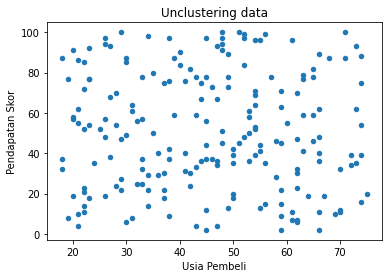

In [10]:
df.plot(kind='scatter', x='CustomerAge', y='SpendingScore')
#plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Skor')
plt.title('Unclustering data')
plt.show()

In [11]:
K = 3
np.random.seed(40)

In [12]:
random_centroids=[]
for i in range(1,K+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])
  print('Randomly selected points as random_centroids:', random_centroids)

Randomly selected points as random_centroids: [[71, 92]]
Randomly selected points as random_centroids: [[71, 92], [8, 38]]
Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


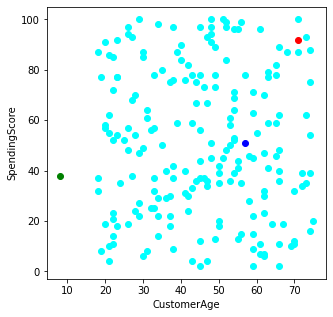

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()  

In [14]:
def assignment(df_new,random_centroids):
  for i in range(length):
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))

    list1=[]
    list2=[]
    for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
      d = min(a,b,c)

      if d == a:
        list1.append(0)
        list2.append('r')
      elif d == b:
        list1.append(1)
        list2.append('g')
      else:
        list1.append(2)
        list2.append('b')
        df_new['Closest_Centroids'] = list1
        df_new['Color']=list2
        return df_new


In [15]:
df_new = assignment(df_new, random_centroids)
df_new.head()

KeyError: ignored

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

KeyError: ignored

<Figure size 360x360 with 0 Axes>

In [4]:
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
    random_centroids[i][1] = np.mean(df.new[df_new['Closest_Centroid'] == i]['SpendingScore'])
    return parameter

In [5]:
random_centroids = update(random_centroids)
random_centroids

NameError: ignored

In [18]:
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figurre(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
  plt.show()

KeyError: ignored

In [19]:
count=1
while True:
  old_randmo_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)

new_random_centroids = np.round(random_centroids)
print('New Centroid',new_random_centroids)

df_new = assignment(df_new, random_centroids)
result=np.allclose(old_random_centroids,new_random_centroids)
print(result)
if result == True:
  break



  print(count)

SyntaxError: ignored

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:.1], color==df_new['color'], alpha=0.5, edgecolor='k')
plt.show()

TypeError: ignored

<Figure size 360x360 with 0 Axes>

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

ValueError: ignored

In [1]:
labels = KMeans.predict(df)
labels

NameError: ignored

In [23]:
centroids = kmeans.clusters_centers_
centroids

AttributeError: ignored

In [24]:
kmeans.inertia_

AttributeError: ignored

In [25]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['CustomerAge'], df['spendingscore'], color=color1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
  plt.xlabel('Usia')
  plt.ylabel('pendapatan skor')
  plt.title('plot ter-clusterisasi k-Means')
  plt.show()

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [1]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans =KMeans(n_clusters=num_clusters)
  Kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

NameError: ignored

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai Inertia')
plt.title('Elbow curve')
plt.show()

NameError: ignored